In [14]:
# For the examiner: there's a lot of code I have lef out due it not panning out. Meaning that it would be
# spaghetti code with no real use. This includes scraping data from the internet, and plotting attributes
# against each other which didn't yield any results.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Read in data from csv file and clean it up

In [15]:
data = pd.read_csv("vgs.csv")
for row in data.iterrows():
    if type(row[1].Name) == float:
        data = data.drop(row[0])
    for i in row[1]:
        if(i=="tbd"):
            data.loc[row[0], "User_Score"] = np.nan

for row in data.iterrows():
    data.loc[row[0], "User_Score"] = float(data.loc[row[0], "User_Score"])
data = data.dropna()
data = data[data.Year_of_Release >= 2000]
for row in data.iterrows():
    data.loc[row[0], "User_Score"] = float(row[1].User_Score)
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


# Plot critic score, user score, and global sales

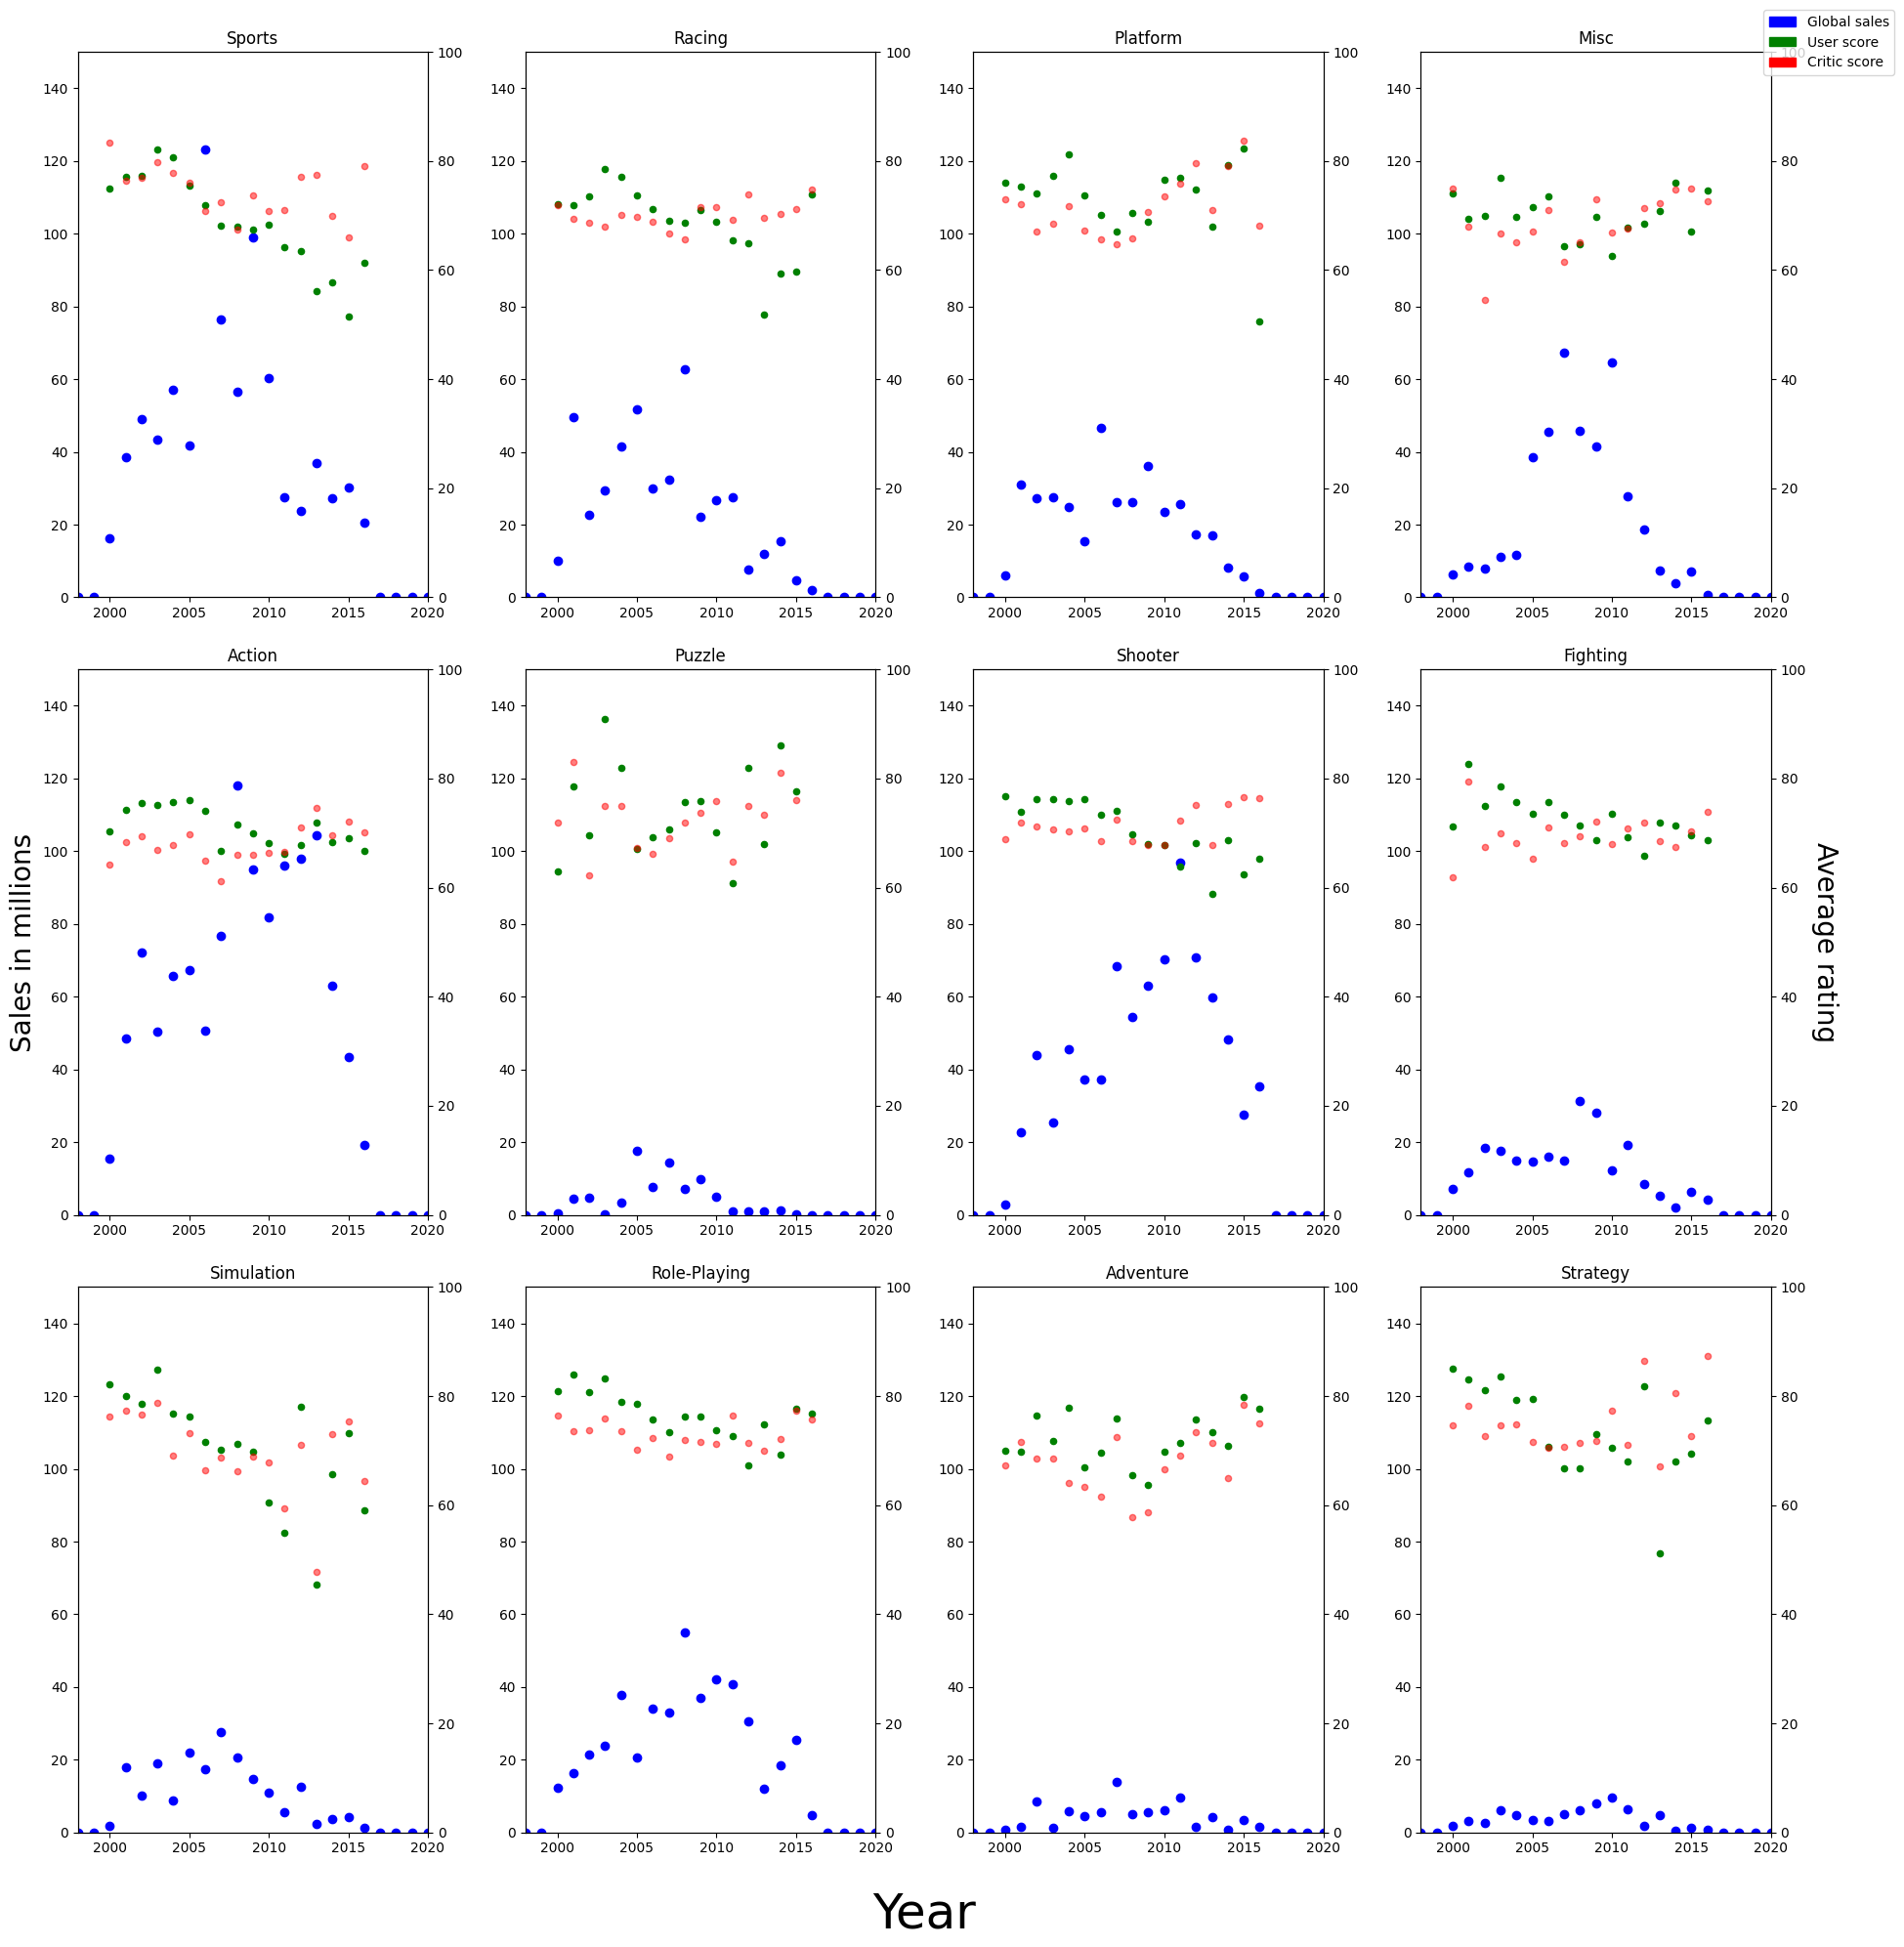

In [16]:
fig, axs = plt.subplots(3, 4, figsize=(20, 20))
i = 0
def listToDict(a):
    dictFromList = {}
    for item in a:
        dictFromList[item] = 0
    return dictFromList
genres = data["Genre"].unique()
#avgScore = sales.copy()
for genre in genres:
    yearGenre = data[data["Genre"]==genre]
    years = yearGenre.Year_of_Release.value_counts().to_dict()
    sales1 = listToDict([year for year in range(1980, 2022)])
    sales2 = listToDict([year for year in range(1980, 2022)])
    sales3 = listToDict([year for year in range(1980, 2022)])
    scores1 = sales1.copy()
    scores2 = sales2.copy()
    for index, row in yearGenre.iterrows():
        if str(row.Year_of_Release) == "nan":
            continue
        if str(row.User_Score) != "nan":
            sales1[row.Year_of_Release] += row.User_Score
            scores1[row.Year_of_Release] += 1
        if str(row.Critic_Score) != "nan":
            sales2[row.Year_of_Release] += row.Critic_Score
            scores2[row.Year_of_Release] += 1
        sales3[row.Year_of_Release] += row.Global_Sales
    for key,val in sales1.items():
        if scores1[key] != 0:
            sales1[key] = 10*sales1[key]/scores1[key]
    for key,val in sales2.items():
        if scores2[key] != 0:
            sales2[key] = sales2[key]/scores2[key]
    sales1 = {key:val for key,val in sales1.items() if val!=0}
    sales2 = {key:val for key,val in sales2.items() if val!=0}
    row = i//4
    col = i%4
    ax2 = axs[row][col].twinx()
    ax2.scatter(sales1.keys(), sales1.values(), color ='green', s=20)
    ax2.scatter(sales2.keys(), sales2.values(), color='red', s=20, alpha=0.5)
    ax2.set_ylim(0, 100)
    axs[row][col].scatter(sales3.keys(), sales3.values(), color='blue')
    axs[row][col].set_title(genre)
    axs[row][col].set_ylim(0, 150)
    axs[row][col].set_xlim(1998, 2020)
    i+=1
fig.supxlabel('Year', fontsize=36)
# Y label left
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])
[ax.spines[side].set_visible(False) for side in ('left', 'top', 'right', 'bottom')]
ax.patch.set_visible(False)
ax.set_ylabel('Sales in millions', labelpad=30, fontsize=20)
# Y label right
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])
[ax.spines[side].set_visible(False) for side in ('left', 'top', 'right', 'bottom')]
ax.patch.set_visible(False)
ax.yaxis.set_label_position('right')
ax.set_ylabel('Average rating', labelpad=50, fontsize = 20, rotation = 270)
# plot show
sales = mpatches.Patch(color='blue', label='Global sales')
userScore = mpatches.Patch(color='green', label='User score')
criticScore = mpatches.Patch(color='red', label='Critic score')
fig.tight_layout(pad=2)
fig.legend(handles=[sales, userScore, criticScore], bbox_to_anchor =(1, 1))
fig.savefig("fig1.svg")
plt.show()

# Gather info about global sales and user score per year for every publisher

In [17]:
def gatherTopSalesWithUserScore(df):
    publishers = {}
    for i, row in df.iterrows():
        if row.Publisher not in publishers:
            publishers[row.Publisher] = {}
        if row.Year_of_Release not in publishers[row.Publisher]:
            publishers[row.Publisher][row.Year_of_Release] = [0, 0, 0, 0]
        publishers[row.Publisher][row.Year_of_Release][0] += row.Global_Sales
        publishers[row.Publisher][row.Year_of_Release][1] += row.User_Score
        publishers[row.Publisher][row.Year_of_Release][2] += row.Critic_Score
        publishers[row.Publisher][row.Year_of_Release][3] += 1
        
    for publisher in publishers:
        totalSales = 0
        totalRatingUser = 0
        totalRatingCritic = 0
        ratingCount = 0
        for year in publishers[publisher]:
            items = publishers[publisher][year]
            totalSales += items[0]
            totalRatingUser += items[1]
            totalRatingCritic += items[2]
            ratingCount += items[3]
            publishers[publisher][year] = items[0], items[1]/items[3], items[2]/items[3]
        publishers[publisher]['total'] = totalSales, totalRatingUser/ratingCount, totalRatingCritic/ratingCount
    return publishers

# Top 10 publishers by global sales

In [18]:
top10BySales = []
publishers = gatherTopSalesWithUserScore(data)
for _ in range(10):
    maxSales = 0
    maxPublisher = ""
    for publisher in publishers:
        if publishers[publisher]['total'][0] > maxSales:
            maxSales = publishers[publisher]['total'][0]
            maxPublisher = publisher
    top10BySales.append((maxPublisher,publishers[maxPublisher]))
    del publishers[maxPublisher]

In [19]:
top10BySales

[('Electronic Arts',
  {2015.0: (23.54, 5.166666666666666, 73.26666666666667),
   2012.0: (42.249999999999964, 6.197297297297294, 76.97297297297297),
   2009.0: (70.85999999999999, 6.974324324324326, 73.6891891891892),
   2016.0: (25.049999999999997, 6.3, 81.22727272727273),
   2011.0: (54.15, 6.57142857142857, 75.6734693877551),
   2003.0: (67.85999999999999, 7.8645569620253175, 77.0506329113924),
   2004.0: (62.300000000000004, 7.925000000000001, 77.11111111111111),
   2002.0: (66.72000000000003, 7.866666666666667, 78.43939393939394),
   2013.0: (50.45, 5.417142857142857, 75.2),
   2014.0: (30.290000000000003, 5.866666666666667, 75.29166666666667),
   2010.0: (70.86000000000001, 6.7671874999999995, 73.515625),
   2005.0: (59.490000000000016, 7.612871287128711, 74.23762376237623),
   2006.0: (47.99000000000001, 7.349999999999999, 71.925),
   2001.0: (37.620000000000005, 7.859375000000001, 78.375),
   2007.0: (67.01000000000005, 7.037634408602149, 71.96774193548387),
   2008.0: (69.559

# Top 10 publishers by user average user score

In [20]:
top10ByScore = []
publishers_ = publishers.copy()
for _ in range(10):
    maxRating = 0
    maxPublisher = ""
    for publisher in publishers_:
        if publishers_[publisher]['total'][0] > maxRating:
            maxRating = publishers_[publisher]['total'][1]
            maxPublisher = publisher
    top10ByScore.append((maxPublisher,publishers_[maxPublisher]))
    del publishers_[maxPublisher]

In [21]:
top10ByScore

[('Nippon Ichi Software',
  {2014.0: (2.1299999999999994, 7.553846153846153, 69.84615384615384),
   2011.0: (1.3900000000000001, 7.3, 69.5),
   2013.0: (2.7799999999999994, 7.707142857142858, 70.35714285714286),
   2010.0: (0.69, 5.75, 61.75),
   2015.0: (1.1800000000000002, 7.7, 68.5),
   2009.0: (0.67, 6.8999999999999995, 67.75),
   2008.0: (0.38, 6.433333333333334, 53.333333333333336),
   2016.0: (0.43000000000000005, 7.033333333333334, 73.83333333333333),
   2012.0: (0.36, 6.2, 55.0),
   2007.0: (0.06, 7.5, 69.0),
   'total': (10.069999999999999, 7.251666666666668, 67.9)}),
 ('Rising Star Games',
  {2007.0: (2.7499999999999996, 7.133333333333334, 63.888888888888886),
   2008.0: (2.87, 7.545454545454546, 63.54545454545455),
   2009.0: (2.6700000000000004, 7.527272727272726, 67.0909090909091),
   2006.0: (1.25, 7.659999999999999, 66.2),
   2013.0: (0.5, 6.533333333333334, 53.666666666666664),
   2010.0: (0.76, 7.625, 73.75),
   2011.0: (0.86, 8.225, 78.75),
   2005.0: (0.15, 5.966666

# Plot top10BySales by year and global sales

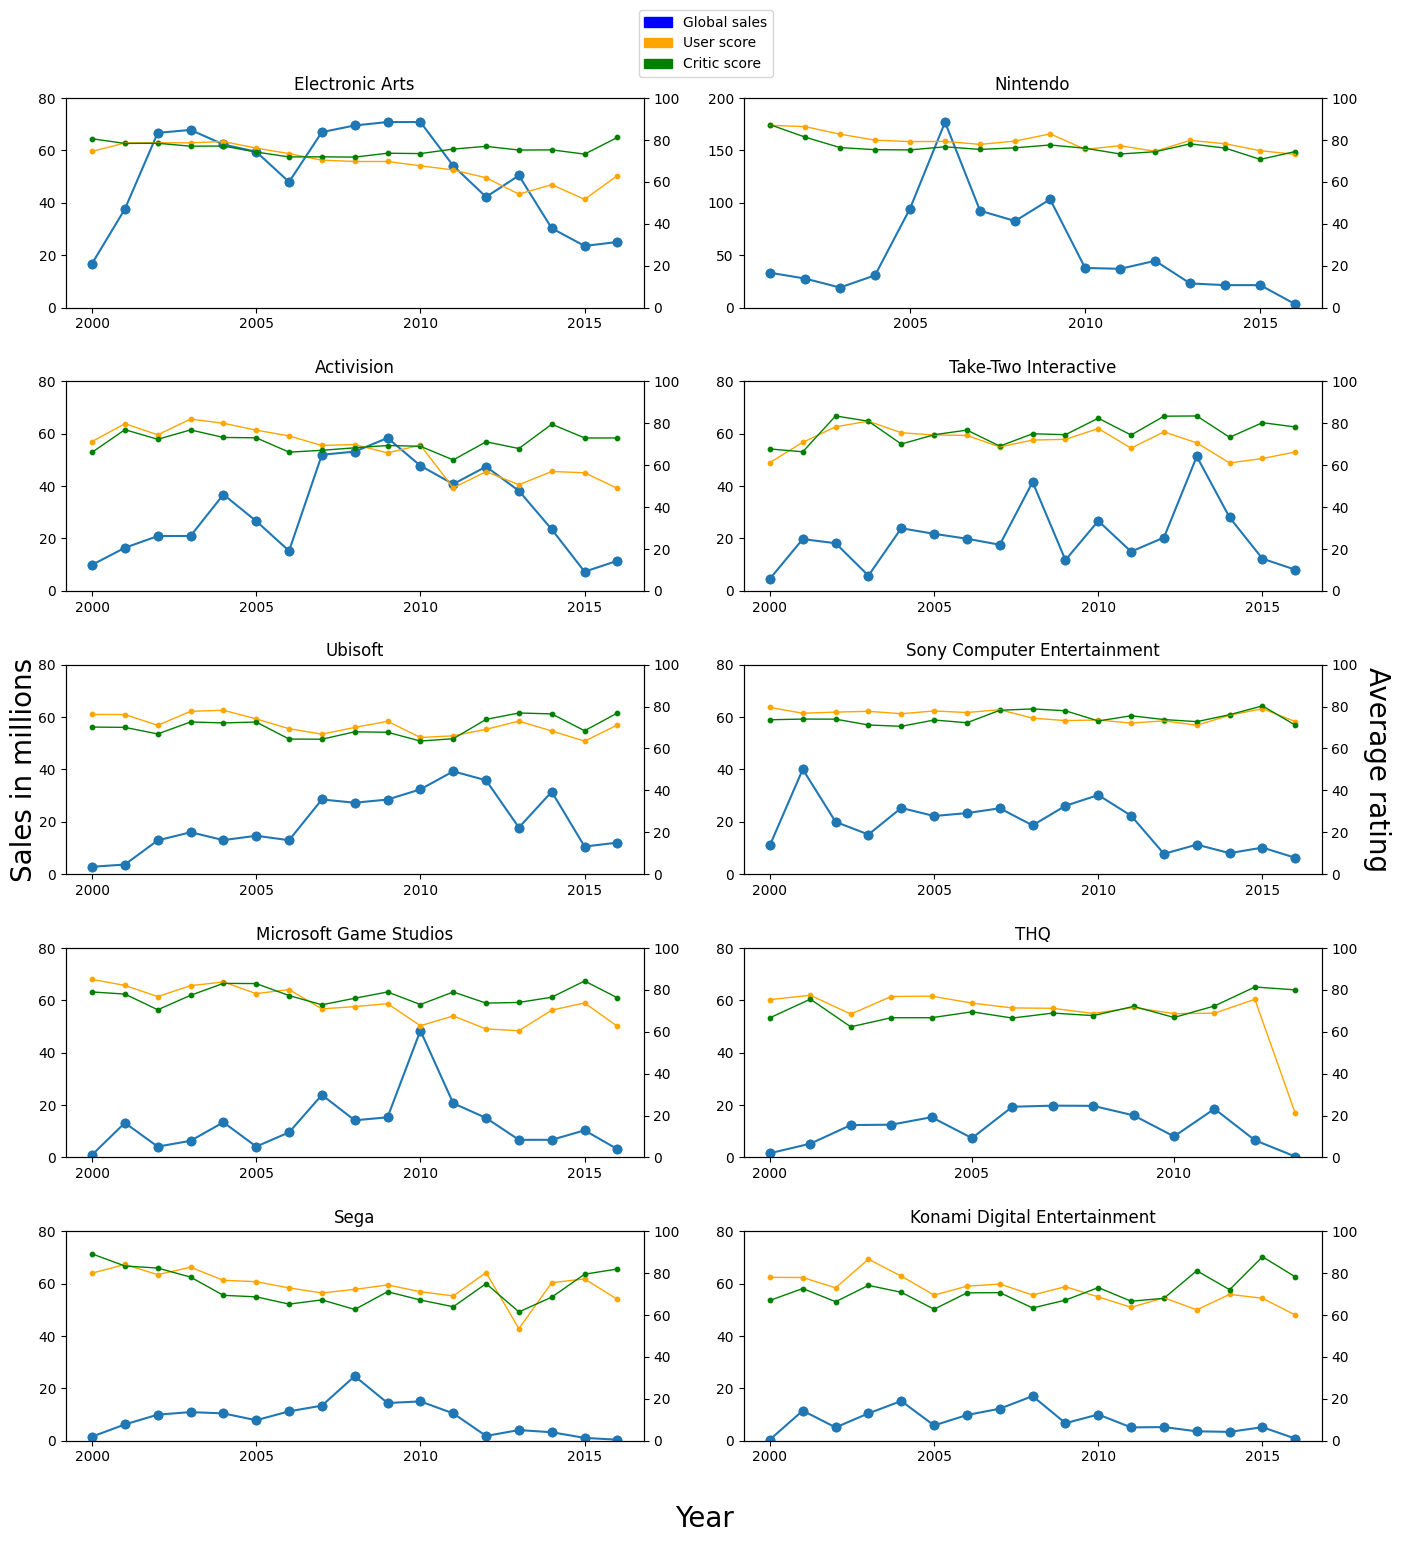

In [22]:
fig, axs = plt.subplots(5, 2, figsize=(15, 15))
i = 0
for publisher in top10BySales:
    title = publisher[0]
    df = {}
    for year, value in publisher[1].items():
        if year == 'total':
            continue
        df[int(year)] = value
    df = dict(sorted(df.items()))
    row = i//2
    col = i%2
    X = df.keys()
    Y = [sales for sales, ratingUser, ratingCritic in df.values()]
    userRatings = [10*userRating for sales, userRating, criticRating in df.values()]
    criticRatings = [criticRating for sales, userRating, criticRating in df.values()]
    axs[row][col].set_xticks([2000, 2005, 2010, 2015])
    axs[row][col].plot(X, Y, "-o")
    axs[row][col].scatter(X, Y)
    if title == "Nintendo":
        axs[row][col].set_ylim(0, 200)
    else:
        axs[row][col].set_ylim(0, 80)
    ax2 = axs[row][col].twinx()
    ax2.plot(X, userRatings, color="orange", linewidth=1)
    ax2.scatter(X, userRatings, color="orange", s=10)
    ax2.plot(X, criticRatings, color="green", linewidth=1)
    ax2.scatter(X, criticRatings, color="green", s=10)
    ax2.set_ylim(0, 100)
    axs[row][col].set_title(title)
    i+=1
fig.supxlabel('Year', fontsize=20)
# Y label left
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])
[ax.spines[side].set_visible(False) for side in ('left', 'top', 'right', 'bottom')]
ax.patch.set_visible(False)
ax.set_ylabel('Sales in millions', labelpad=20, fontsize=20)
# Y label right
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])
[ax.spines[side].set_visible(False) for side in ('left', 'top', 'right', 'bottom')]
ax.patch.set_visible(False)
ax.yaxis.set_label_position('right')
ax.set_ylabel('Average rating', labelpad=50, fontsize = 20, rotation = 270)
# plot show
sales = mpatches.Patch(color='blue', label='Global sales')
userScore = mpatches.Patch(color='orange', label='User score')
criticScore = mpatches.Patch(color='green', label='Critic score')
fig.tight_layout(pad=2)
fig.legend(handles=[sales, userScore, criticScore], bbox_to_anchor =(0.55, 1.03))
plt.savefig("fig2.svg")
plt.show()

# Plot top10ByScore by year and global sales

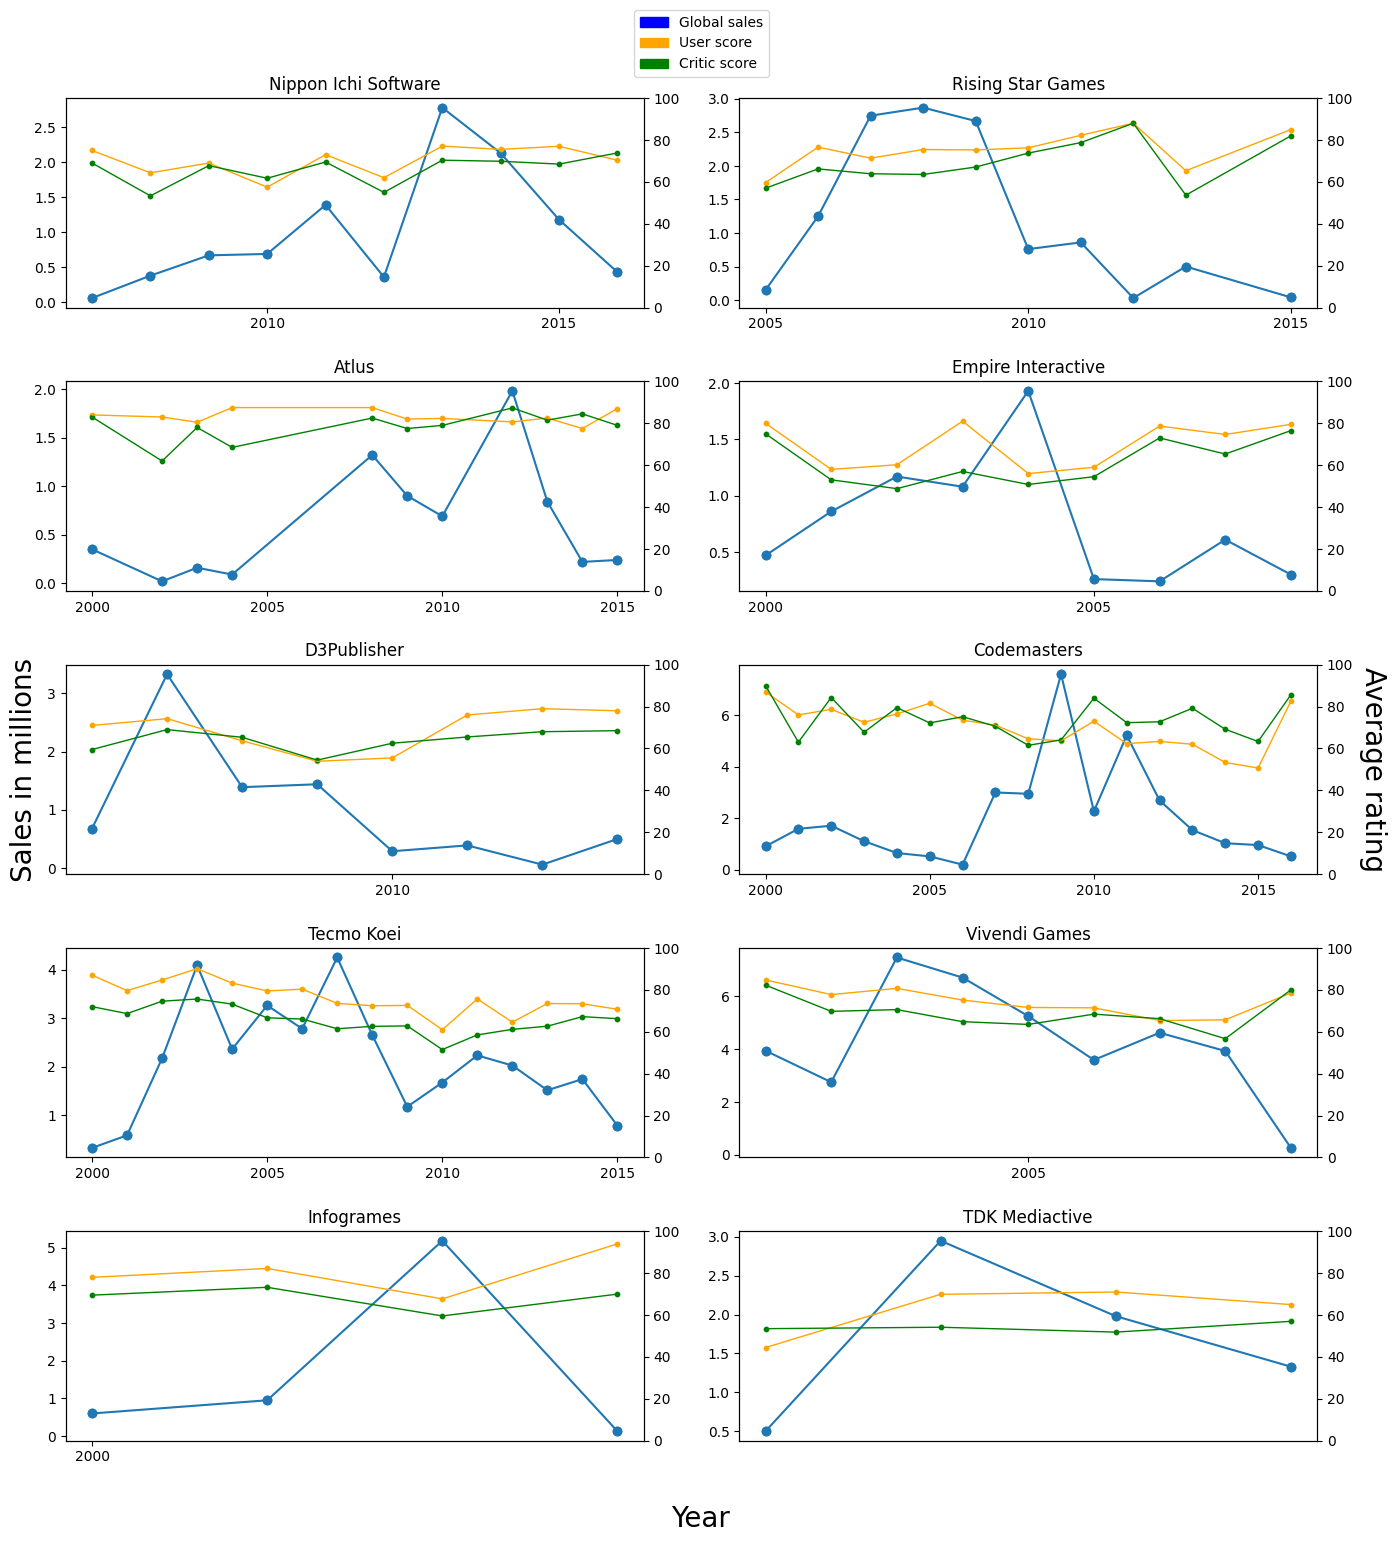

In [23]:
fig, axs = plt.subplots(5, 2, figsize=(15, 15))
i = 0
for publisher in top10ByScore:
    title = publisher[0]
    df = {}
    for year, value in publisher[1].items():
        if year == 'total':
            continue
        df[int(year)] = value
    df = dict(sorted(df.items()))
    row = i//2
    col = i%2
    X = df.keys()
    Y = [sales for sales, ratingUser, ratingCritic in df.values()]
    userRatings = [10*userRating for sales, userRating, criticRating in df.values()]
    criticRatings = [criticRating for sales, userRating, criticRating in df.values()]
    axs[row][col].set_xticks([2000, 2005, 2010, 2015])
    axs[row][col].plot(X, Y, "-o")
    axs[row][col].scatter(X, Y)
    ax2 = axs[row][col].twinx()
    ax2.plot(X, userRatings, color="orange", linewidth=1)
    ax2.scatter(X, userRatings, color="orange", s=10)
    ax2.plot(X, criticRatings, color="green", linewidth=1)
    ax2.scatter(X, criticRatings, color="green", s=10)
    ax2.set_ylim(0, 100)
    axs[row][col].set_title(title)
    i+=1
fig.supxlabel('Year', fontsize=20)
# Y label left
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])
[ax.spines[side].set_visible(False) for side in ('left', 'top', 'right', 'bottom')]
ax.patch.set_visible(False)
ax.set_ylabel('Sales in millions', labelpad=20, fontsize=20)
# Y label right
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])
[ax.spines[side].set_visible(False) for side in ('left', 'top', 'right', 'bottom')]
ax.patch.set_visible(False)
ax.yaxis.set_label_position('right')
ax.set_ylabel('Average rating', labelpad=50, fontsize = 20, rotation = 270)
# plot show
sales = mpatches.Patch(color='blue', label='Global sales')
userScore = mpatches.Patch(color='orange', label='User score')
criticScore = mpatches.Patch(color='green', label='Critic score')
fig.tight_layout(pad=2)
fig.legend(handles=[sales, userScore, criticScore], bbox_to_anchor =(0.55, 1.03))
plt.savefig("fig3.svg")
plt.show()

# Split the data into three categories. NA, EU, and JP sales.

In [24]:
NA = data[(data.NA_Sales > data.EU_Sales) & (data.NA_Sales > data.JP_Sales) & (data.NA_Sales > data.Other_Sales)]
EU = data[(data.EU_Sales > data.NA_Sales) & (data.EU_Sales > data.JP_Sales) & (data.EU_Sales > data.Other_Sales)]
JP = data[(data.JP_Sales > data.EU_Sales) & (data.JP_Sales > data.NA_Sales) & (data.JP_Sales > data.Other_Sales)]
OT = data[(data.Other_Sales > data.EU_Sales) & (data.Other_Sales > data.NA_Sales) & (data.Other_Sales > data.JP_Sales)]

# Plot most popular publishers by region

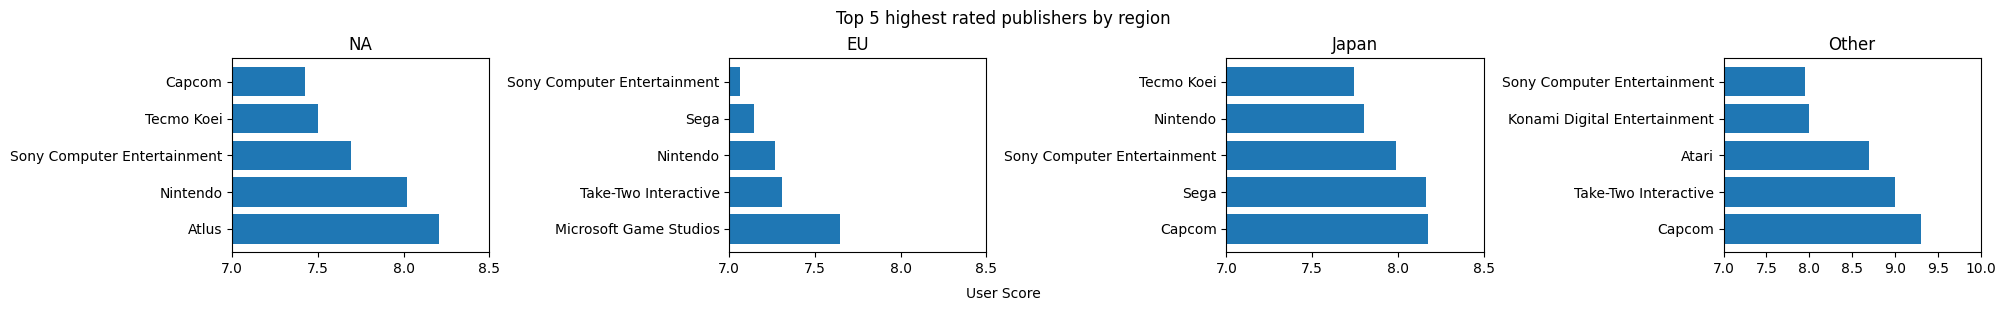

In [25]:
top = [{}, {}, {}, {}]
def topSales(region, regionAsStr):
    idx = 0
    if regionAsStr == "NA":
        idx = 0
    elif regionAsStr == "EU":
        idx = 1
    elif regionAsStr == "JP":
        idx = 2
    elif regionAsStr == "OT":
        idx = 3
    else:
        return
    sales = gatherTopSalesWithUserScore(region)
    del sales["THQ"]
    for _ in range(5):
        highestSales = 0
        highestPublisher = ""
        for publisher in sales:
            if(regionAsStr == "OT"):
                if(sales[publisher]["total"][1] > highestSales):
                    highestSales = sales[publisher]["total"][1]
                    highestPublisher = publisher
            else:
                if(sales[publisher]["total"][1] > highestSales and len(sales[publisher]) > 10):
                    highestSales = sales[publisher]["total"][1]
                    highestPublisher = publisher
        top[idx][highestPublisher] = sales[highestPublisher]
        del sales[highestPublisher]

topSales(NA, "NA")
topSales(EU, "EU")
topSales(JP, "JP")
topSales(OT, "OT")

fig, axs = plt.subplots(1, 4, figsize=(20, 3))
titles = ["NA", "EU", "Japan", "Other"]
for i in range(4):
    scores = []
    for key in top[i].keys():
        scores.append(top[i][key]["total"][1])
    axs[i].barh(list(top[i].keys()), scores)
    axs[i].set_xlim(7, 8.5)
    axs[i].set_xticks(np.arange(7, 8.75, 0.5))
    if i==3:
        axs[i].set_xlim(7, 10)
        axs[i].set_xticks(np.arange(7, 10.5, 0.5))
    axs[i].set_title(titles[i])
fig.supxlabel('User Score', fontsize=10)
fig.suptitle("Top 5 highest rated publishers by region")
fig.tight_layout(pad=0.5)
plt.savefig("fig4.svg")
plt.show()